# PCA
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
data= pd.read_csv('./abalone.csv')

In [25]:
data.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [26]:
x=data.iloc[:,1:]

In [27]:
x.head()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [38]:
x_scaled= sc.fit_transform(x)

In [39]:
x_scaled

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [28]:
# importing PCA

from sklearn.decomposition import PCA
pca=PCA()

In [40]:
pca.fit(x_scaled)

PCA()

### Explained Varience: Eigen Values 

In [41]:
eigValues= pca.explained_variance_

In [42]:
eigValues

array([6.71404654e+00, 6.95779541e-01, 2.58505008e-01, 1.66029591e-01,
       8.49700060e-02, 6.34879663e-02, 1.26972036e-02, 6.39985662e-03])

### Percentage of information

In [43]:
ratio= pca.explained_variance_ratio_

In [44]:
ratio

array([8.39054894e-01, 8.69516209e-02, 3.23053901e-02, 2.07487304e-02,
       1.06187080e-02, 7.93409586e-03, 1.58677048e-03, 7.99790556e-04])

In [45]:
# Cummalative sum

ratio_cum= np.cumsum(ratio)
ratio_cum

array([0.83905489, 0.92600651, 0.9583119 , 0.97906064, 0.98967934,
       0.99761344, 0.99920021, 1.        ])

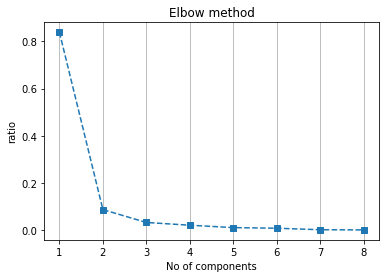

In [46]:
# Elbow method
plt.plot(ratio, 's--')
plt.title("Elbow method")
plt.xlabel("No of components")
plt.ylabel("ratio")
plt.grid(axis='x')
plt.xticks(list(range(0,len(ratio))),list(range(1,len(ratio)+1)))
plt.show()

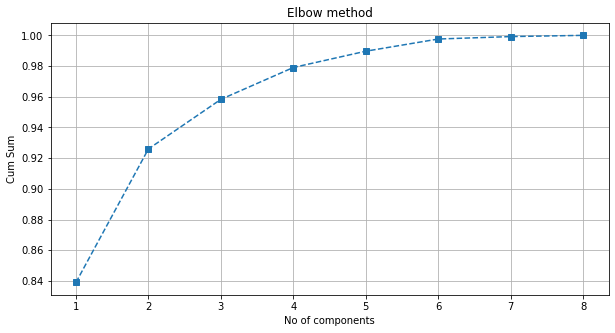

In [47]:
plt.figure(figsize=(10,5))
plt.plot(ratio_cum, 's--')
plt.title("Elbow method")
plt.xlabel("No of components")
plt.ylabel("Cum Sum")
plt.grid()
plt.xticks(list(range(0,len(ratio))),list(range(1,len(ratio)+1)))
plt.show()

## We will select 8 components, as cum sum is greater than 80%

In [19]:
pca=PCA(n_components=6)

In [20]:
data_PCA= pca.fit_transform(x_scaled)

In [21]:
data_PCA

array([[-0.77083361,  0.28190981, -0.04076204, -0.06330548, -0.08574267,
         0.05495712],
       [-0.6368418 ,  0.15326541, -0.2168582 , -0.03584487,  0.08014179,
         0.0064524 ],
       [ 0.73218576, -0.43964367, -0.01887084,  0.336703  ,  0.08246479,
        -0.08833845],
       ...,
       [-0.7328491 ,  0.20402386, -0.2419349 , -0.03357426,  0.09190122,
         0.00472778],
       [-0.71767876,  0.19500436, -0.23258372, -0.04827004,  0.09400123,
         0.00455542],
       [-0.08388359, -0.02997516, -0.15589243,  0.09096019,  0.13532431,
        -0.05977661]])

In [22]:
data_PCA.shape

(9840, 6)

In [23]:
pd.DataFrame(data_PCA)

,0,1,2,3,4,5
0,-0.770834,0.281910,-0.040762,-0.063305,-0.085743,0.054957
1,-0.636842,0.153265,-0.216858,-0.035845,0.080142,0.006452
2,0.732186,-0.439644,-0.018871,0.336703,0.082465,-0.088338
3,2.257551,-2.218218,1.547885,-6.166680,0.729739,0.037366
4,1.331226,-0.948855,0.286823,-0.136187,-0.195372,0.131421
...,...,...,...,...,...,...
9835,-0.767975,0.279309,-0.044154,-0.070352,-0.088748,0.058248
9836,-0.732479,0.204442,-0.241672,-0.033426,0.092257,0.004537
9837,-0.732849,0.204024,-0.241935,-0.033574,0.091901,0.004728
9838,-0.717679,0.195004,-0.232584,-0.048270,0.094001,0.004555


In [29]:
pca.components_

array([[-0.18227112,  0.09628467,  0.07595838, -0.00221968, -0.05812014,
        -0.13588247, -0.63823307, -0.02411243, -0.38586723, -0.30100285,
        -0.36251032, -0.26551373, -0.28354373,  0.01274717],
       [ 0.06037599, -0.06178098, -0.16008751, -0.26068148, -0.21216104,
        -0.15944812,  0.46244234, -0.11907056, -0.13898009, -0.06777595,
         0.02943741, -0.59462442, -0.24925043, -0.40001086],
       [ 0.03858712, -0.02233605,  0.4856906 ,  0.05445947, -0.10005976,
         0.02141581,  0.35107982,  0.00993132, -0.10127855, -0.63175992,
        -0.0991878 ,  0.40464082, -0.13418286, -0.15610665],
       [ 0.13669342,  0.13107231,  0.12268426,  0.34577401,  0.60170422,
         0.25151365, -0.00445443,  0.33998538,  0.00543202, -0.19934001,
         0.13361973, -0.39862356,  0.11990823, -0.24022485],
       [-0.15282925,  0.23380104, -0.339593  , -0.01158933,  0.15757625,
         0.25348782, -0.04726902,  0.08021202,  0.0760234 ,  0.14202279,
         0.00208466,  0.38